In [64]:
import pandas as pd
import numpy as np
from pydataset import data
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
import matplotlib.pyplot as plt

Exercises

Do your work for this exercise in a jupyter notebook named feature_engineering within the regression-exercises repo. Add, commit, and push your work.

1) Load the tips dataset.

In [65]:
df = data('tips')

In [66]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [93]:
df.shape

(244, 5)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


In [68]:
df = df.drop(columns = ['sex','smoker','day','time'])

A) Create a column named tip_percentage. This should be the tip amount divided by the total bill. 

In [69]:
df['tip_percentage'] = df['tip'] / df['total_bill']

B) Create a column named price_per_person. This should be the total bill divided by the party size.

In [70]:
df['price_per_person'] = df['total_bill']/df['size']

In [71]:
df.head()

,total_bill,tip,size,tip_percentage,price_per_person
1,16.99,1.01,2,0.059447,8.495000
2,10.34,1.66,3,0.160542,3.446667
3,21.01,3.50,3,0.166587,7.003333
4,23.68,3.31,2,0.139780,11.840000
5,24.59,3.61,4,0.146808,6.147500


In [72]:
def split_tips(df):
    '''
    Takes in a cleaned df of tips data and splits the data appropriatly into train, validate, and test.
    '''
    
    train_val, test = train_test_split(df, train_size =  0.8, random_state = 123)
    train, validate = train_test_split(df, train_size =  0.8, random_state = 123)
    return train, validate, test

In [73]:
train, validate, test = split_tips(df)

In [74]:
train.head()

,total_bill,tip,size,tip_percentage,price_per_person
24,39.42,7.58,4,0.192288,9.855
191,15.69,1.50,2,0.095602,7.845
210,12.76,2.23,2,0.174765,6.380
11,10.27,1.71,2,0.166504,5.135
197,10.34,2.00,2,0.193424,5.170


In [81]:
def minmax_scale(train, validate, test):
    
    # Make the thing
    scaler = sklearn.preprocessing.MinMaxScaler()

    # We fit on the training data
    # in a way, we treat our scalers like our ML models
    # we only .fit on the training data
    scaler.fit(train)
    
    train_scaled = scaler.transform(train)
    validate_scaled = scaler.transform(validate)
    test_scaled = scaler.transform(test)
    
    # turn the numpy arrays into dataframes
    train_scaled = pd.DataFrame(train_scaled, columns=train.columns)
    validate_scaled = pd.DataFrame(validate_scaled, columns=train.columns)
    test_scaled = pd.DataFrame(test_scaled, columns=train.columns)
    
    fig = plt.figure(figsize=(12, 6))
    gs = plt.GridSpec(2,2)
    
    ax1 = fig.add_subplot(gs[0, :])
    
    ax1.title.set_text('total_bill')
    
    ax1.hist(train_scaled.total_bill)
    
    return train_scaled, validate_scaled, test_scaled

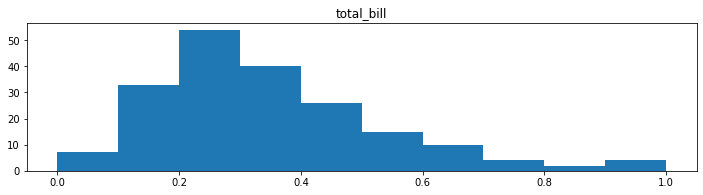

In [82]:
train_scaled, validate_scaled, test_scaled = minmax_scale(train, validate, test)

C) Before using any of the methods discussed in the lesson, which features do you think would be most important for predicting the tip amount? The tip percentage?

In [97]:
# total_bill, size, price_per_person 

D) Use all the other numeric features to predict tip amount. Use select k best and recursive feature elimination to select the top 2 features. What are they?

In [94]:
from sklearn.feature_selection import SelectKBest, f_regression

# parameters: f_regression stats test, give me 8 features
f_selector = SelectKBest(f_regression, k=8)

# find the top 8 X's correlated with y
f_selector.fit(X_train_scaled, y_train)

# boolean mask of whether the column was selected or not. 
feature_mask = f_selector.get_support()

# get list of top K features. 
f_feature = X_train_scaled.iloc[:,feature_mask].columns.tolist()

NameError: name 'X_train_scaled' is not defined

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# initialize the ML algorithm
lm = LinearRegression()

# create the rfe object, indicating the ML object (lm) and the number of features I want to end up with. 
rfe = RFE(lm, 2)

# fit the data using RFE
rfe.fit(X_train_scaled,y_train)  

# get the mask of the columns selected
feature_mask = rfe.support_

# get list of the column names. 
rfe_feature = X_train_scaled.iloc[:,feature_mask].columns.tolist()

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


NameError: name 'X_train_scaled' is not defined

In [96]:
# view list of columns and their ranking

# get the ranks
var_ranks = rfe.ranking_
# get the variable names
var_names = X_train_scaled.columns.tolist()
# combine ranks and names into a df for clean viewing
rfe_ranks_df = pd.DataFrame({'Var': var_names, 'Rank': var_ranks})
# sort the df by rank
rfe_ranks_df.sort_values('Rank')

AttributeError: 'RFE' object has no attribute 'ranking_'

E) Use all the other numeric features to predict tip percentage. Use select k best and recursive feature elimination to select the top 2 features. What are they?

F) Why do you think select k best and recursive feature elimination might give different answers for the top features? Does this change as you change the number of features your are selecting?

2) Write a function named select_kbest that takes in the predictors (X), the target (y), and the number of features to select (k) and returns the names of the top k selected features based on the SelectKBest class. Test your function with the tips dataset. You should see the same results as when you did the process manually.

3) Write a function named rfe that takes in the predictors, the target, and the number of features to select. It should return the top k features based on the RFE class. Test your function with the tips dataset. You should see the same results as when you did the process manually.

4) Load the swiss dataset and use all the other features to predict Fertility. Find the top 3 features using both select k best and recursive feature elimination (use the functions you just built to help you out).